In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib

print('matplotlib: {}'.format(matplotlib.__version__))
import matplotlib.pyplot as plt
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# In addition to the online example, these packages below help dealinf with the file system
import glob
import os
from astropy.io import fits

Python: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
numpy: 1.18.1
matplotlib: 2.2.2
pandas: 0.20.3


In [2]:
dir = "C:/Users/laure/Documents/Summer Research 2019-2020/MQSpectrographPipeline/extraction_data/"     
df = pandas.read_csv(dir+'ThAr.csv')
refwav = pandas.to_numeric(df.loc[:]['Wavelength']) * 10000.
refflux = pandas.to_numeric(df.loc[:]['Flux'])


(79, 4096)


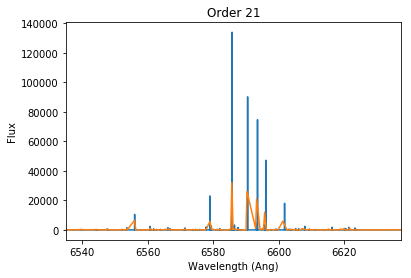

In [4]:

arc2d = fits.getdata(dir+'thar_f1_all_orders_quick.fits', ext=0)
print(arc2d.shape)
#
# Top of 2D frame = red, left side of 2D frame = red

# Chose an 'order' to plot
ord=21
#
# Create the rough linear wavelength vector via a linear function. This
# function is what was tweaked in order to get the extracted spectrum
# to line up with the reference list
StartWav = 6535.0
StepWav = 0.025
lam = StepWav * np.arange(0,arc2d[ord,:].size) + StartWav
# Make plot of extracted spectrum
fig, ax1 = plt.subplots()
ax1.set_xlabel('Wavelength (Ang)')
ax1.set_ylabel('Flux')
ax1.set_title('Order '+str(ord))
ax1.tick_params(axis='y')
ax1.set_xlim(np.amin(lam),np.amax(lam))
ax1.plot(lam,arc2d[ord,:])

# Overplot the reference lines. Note that it looks like a saw-tooth
# in places because it is not an evenly sampled spectrum, but rather
# a list of lines and their flux. This list was used to make the simulated
# arc exposure, so the fluxes in the peaks should be reasonably consistent.
ax1.plot(refwav,refflux)
plt.show()

6612.5
102.375
3900.1354
8897.586


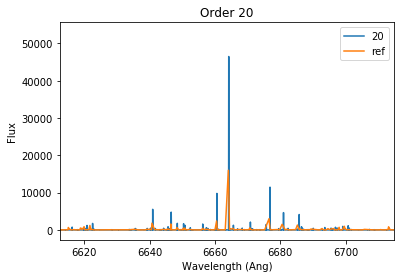

In [5]:
plt.close()
# Chose a different 'order' to plot
ord=20
#
# Assume a simple opffset to the previous lambda vector - adding 77.5 Angstrom
# per change in order
StartWav = 6535.0
StepWav = 0.025
print((StartWav+(np.abs(ord-21)*77.5)))
lam = StepWav * np.arange(0,arc2d[ord,:].size) + (StartWav+(np.abs(ord-21)*77.5))
#lam = StepWav * np.arange(0,arc2d[ord,:].size) + StartWav
print(np.amax(lam)-np.amin(lam))
# Make plot of extracted spectrum
fig, ax1 = plt.subplots()
ax1.set_xlabel('Wavelength (Ang)')
ax1.set_ylabel('Flux')
ax1.set_title('Order '+str(ord))
ax1.tick_params(axis='y')
ax1.set_xlim(np.amin(lam),np.amax(lam))
ax1.plot(lam,arc2d[ord,:], label='20')

# Overplot the reference lines. Note that it looks like a saw-tooth
# in places because it is not an evenly sampled spectrum, but rather
# a list of lines and their flux. This list was used to make the simulated
# arc exposure, so the fluxes in the peaks should be reasonably consistent.
print(min(refwav))
print(max(refwav))
ax1.plot(refwav,refflux, label='ref')
plt.legend()
plt.show()

8644.6


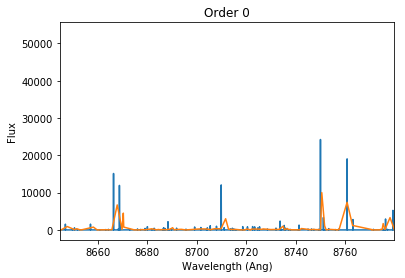

In [140]:
## Chose a different 'order' to plot
ord=0
#
# Assume a simple opffset to the previous lambda vector - adding 77.5 Angstrom
# per change in order
StartWav = 8514.6
Jump = 130
StepWav = 0.033
print(Jump+StartWav)
#lam = StepWav * np.arange(0,arc2d[ord,:].size) + (StartWav+(np.abs(ord-21)*77))
lam = StepWav * np.arange(0,arc2d[ord,:].size) + StartWav + Jump
# Make plot of extracted spectrum
fig, ax1 = plt.subplots()
ax1.set_xlabel('Wavelength (Ang)')
ax1.set_ylabel('Flux')
ax1.set_title('Order '+str(ord))
ax1.tick_params(axis='y')
ax1.set_xlim(np.amin(lam),np.amax(lam))
ax1.plot(lam,arc2d[ord,:])

# Overplot the reference lines. Note that it looks like a saw-tooth
# in places because it is not an evenly sampled spectrum, but rather
# a list of lines and their flux. This list was used to make the simulated
# arc exposure, so the fluxes in the peaks should be reasonably consistent.
ax1.plot(refwav,refflux)
plt.show()


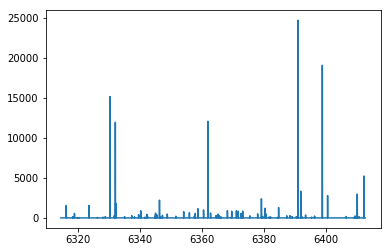

In [168]:
# This one looks like your 'order 1' plot
plt.plot(lam,arc2d[77,:])